### 🦇 Interpolación de la riqueza de Chiroptera en el Quindío

En este trabajo se analiza cómo varía la riqueza de especies del orden **Chiroptera** (murciélagos) en función de la altitud en el departamento del **Quindío, Colombia**. Esta información fue tomada del artículo científico:

> *Solari, S., & Muñoz-Arango, J. (2020). Los mamíferos del Quindío II: diversidad por gradiente altitudinal. Revista de la Academia Colombiana de Ciencias Exactas, Físicas y Naturales, 44(171), 781–797.*

La Figura 3 del artículo presenta una matriz de presencia/ausencia por altitud para diferentes órdenes de mamíferos. Con base en esta figura, se extrajeron los datos aproximados de la **riqueza específica de Chiroptera** a lo largo del gradiente altitudinal.

El objetivo es **interpolar estos datos** usando diversos métodos numéricos (Lagrange, Neville, diferencias divididas, Hermite) y analizar las estimaciones de riqueza en altitudes no muestreadas.

#### 📊 Datos estimados: Riqueza de Chiroptera vs. Altitud



In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Datos
municipios = [
    "Quimbaya", "Montenegro", "La Tebaida", "Calarcá", "Salento",
    "Filandia", "Córdoba", "Génova", "Pijao", "Buenavista"
]

latitudes = np.array([
    4.617, 4.583, 4.450, 4.530, 4.637,
    4.671, 4.390, 4.330, 4.330, 4.333
])

longitudes = np.array([
    -75.760, -75.750, -75.770, -75.650, -75.570,
    -75.663, -75.680, -75.750, -75.700, -75.733
])

altitudes = np.array([
    1100, 1200, 1200, 1550, 1900,
    1800, 1600, 1800, 1700, 1650
])

riqueza = np.array([
    17, 17, 16, 15, 13,
    14, 15, 13, 14, 14
])

# Crear DataFrame
df = pd.DataFrame({
    "Municipio": municipios,
    "Latitud": latitudes,
    "Longitud": longitudes,
    "Altitud (msnm)": altitudes,
    "Riqueza Chiroptera": riqueza_chiroptera
})

# Mostrar tabla
display(df)


,Municipio,Latitud,Longitud,Altitud (msnm),Riqueza Chiroptera
0,Quimbaya,4.617,-75.760,1100,17
1,Montenegro,4.583,-75.750,1200,17
2,La Tebaida,4.450,-75.770,1200,16
3,Calarcá,4.530,-75.650,1550,15
4,Salento,4.637,-75.570,1900,13
5,Filandia,4.671,-75.663,1800,14
6,Córdoba,4.390,-75.680,1600,15
7,Génova,4.330,-75.750,1800,13
8,Pijao,4.330,-75.700,1700,14
9,Buenavista,4.333,-75.733,1650,14


In [11]:
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

# Crear una malla regular de puntos (rejilla de lat/lon)
lon_grid = np.linspace(longitudes.min(), longitudes.max(), 100)
lat_grid = np.linspace(latitudes.min(), latitudes.max(), 100)
lon_mesh, lat_mesh = np.meshgrid(lon_grid, lat_grid)

# Interpolación 2D con griddata
riqueza_interp = griddata(
    points=(longitudes, latitudes),     # puntos conocidos
    values=riqueza,                     # valores en esos puntos
    xi=(lon_mesh, lat_mesh),            # malla de puntos donde interpolamos
    method='cubic'                      # método: 'linear', 'cubic', 'nearest'
)

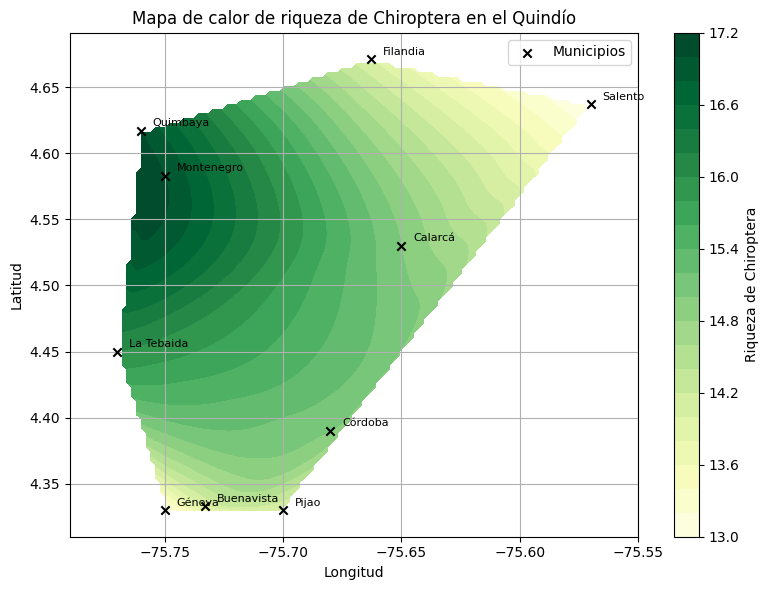

In [26]:
plt.figure(figsize=(8, 6))
contour = plt.contourf(lon_mesh, lat_mesh, riqueza_interp, levels=20, cmap='YlGn')
plt.colorbar(contour, label='Riqueza de Chiroptera')
plt.scatter(longitudes, latitudes, c='black', marker='x', label='Municipios', zorder=5)
for lon, lat, name in zip(longitudes, latitudes, municipios):
    plt.text(lon + 0.005, lat + 0.002, name, fontsize=8, ha='left', va='bottom')
plt.xlim(longitudes.min() - 0.02, longitudes.max() + 0.02)
plt.ylim(latitudes.min() - 0.02, latitudes.max() + 0.02)
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.title("Mapa de calor de riqueza de Chiroptera en el Quindío")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


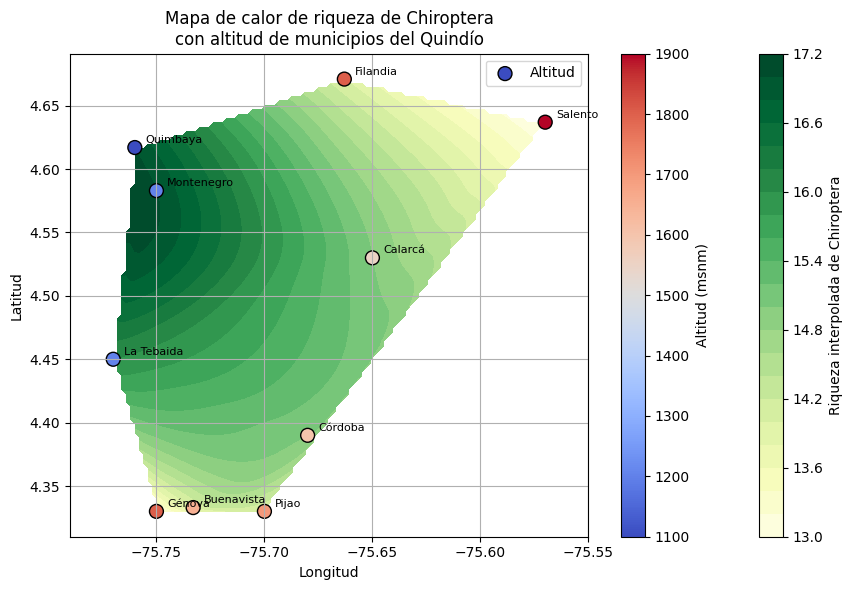

In [27]:
plt.figure(figsize=(9, 6))

# Fondo: mapa de calor interpolado de riqueza
contour = plt.contourf(lon_mesh, lat_mesh, riqueza_interp, levels=20, cmap='YlGn')
plt.colorbar(contour, label='Riqueza interpolada de Chiroptera')
# Puntos reales: color por altitud
sc = plt.scatter(longitudes, latitudes, c=altitudes, cmap='coolwarm', s=100, edgecolors='black', label='Altitud')
cbar = plt.colorbar(sc)
cbar.set_label('Altitud (msnm)')
for lon, lat, name in zip(longitudes, latitudes, municipios):
    plt.text(lon + 0.005, lat + 0.002, name, fontsize=8, ha='left', va='bottom')
plt.xlim(longitudes.min() - 0.02, longitudes.max() + 0.02)
plt.ylim(latitudes.min() - 0.02, latitudes.max() + 0.02)
# Etiquetas y estilo
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.title("Mapa de calor de riqueza de Chiroptera\ncon altitud de municipios del Quindío")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
